In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

/var/folders/56/nrj99gnx2k73vckw5q6r_fvm0000gn/T/ipykernel_76696/1521273946.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
movies_df = pd.read_csv('/Users/khushal/Desktop/Deep Learning Project/movies.csv')
credits_df = pd.read_csv('/Users/khushal/Desktop/Deep Learning Project/credits.csv')

In [3]:
merged_data = pd.merge(movies_df, credits_df, left_on='id', right_on='movie_id')
merged_data.rename(columns={'title_x': 'title_movies', 'title_y': 'title_credits'}, inplace=True)

In [4]:
merged_data.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,spoken_languages,status,tagline,title_movies,vote_average,vote_count,movie_id,title_credits,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [5]:
merged_data.shape

(4803, 24)

Data Preprocessing for Movies

In [6]:
missing_values = merged_data.isnull().sum()
print("Missing values: \n",missing_values)

Missing values: 
 budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title_movies               0
vote_average               0
vote_count                 0
movie_id                   0
title_credits              0
cast                       0
crew                       0
dtype: int64


Handling missing values now:

In [7]:
merged_data['homepage'].fillna('Unknown homepage',inplace=True)
merged_data['overview'].fillna('Unknown overview',inplace=True)
merged_data['release_date'].fillna('Unknown',inplace=True)
merged_data['runtime'].fillna('Unknown runtime',inplace=True)
merged_data['tagline'].fillna('Unknown tagline',inplace=True)

/var/folders/56/nrj99gnx2k73vckw5q6r_fvm0000gn/T/ipykernel_76696/929687967.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_data['homepage'].fillna('Unknown homepage',inplace=True)
/var/folders/56/nrj99gnx2k73vckw5q6r_fvm0000gn/T/ipykernel_76696/929687967.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are settin

In [8]:
import pandas as pd
duplicates = movies_df.duplicated()

# Checing if any column has duplicates
columns_with_duplicates = duplicates.any()

if columns_with_duplicates:
    columns_with_duplicates_names = df.columns[duplicates].tolist()
    print("Columns with duplicate values:", columns_with_duplicates_names)
else:
    print("No columns have duplicate values.")


No columns have duplicate values.


Converting Year of Publication to Int

Now lets verify our Preprocessing of all 3

In [9]:
missing_values = merged_data.isnull().sum()
print("Missing values in movies Dataset:\n", missing_values)

Missing values in movies Dataset:
 budget                  0
genres                  0
homepage                0
id                      0
keywords                0
original_language       0
original_title          0
overview                0
popularity              0
production_companies    0
production_countries    0
release_date            0
revenue                 0
runtime                 0
spoken_languages        0
status                  0
tagline                 0
title_movies            0
vote_average            0
vote_count              0
movie_id                0
title_credits           0
cast                    0
crew                    0
dtype: int64


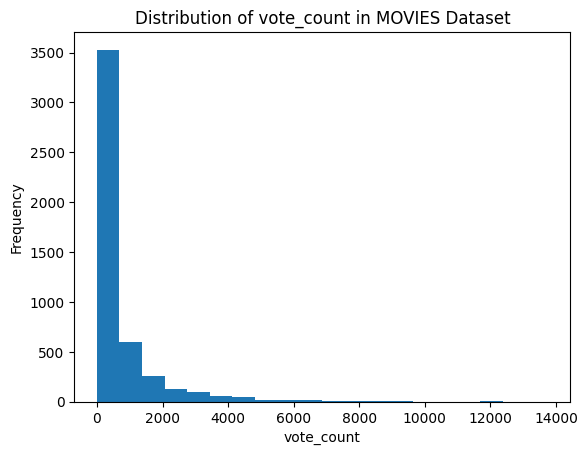

In [10]:
import matplotlib.pyplot as plt

# Plot histogram for 'vote_count' in Users Dataset
plt.hist(movies_df['vote_count'], bins=20)
plt.xlabel('vote_count')
plt.ylabel('Frequency')
plt.title('Distribution of vote_count in MOVIES Dataset')
plt.show()

In [11]:
print("Data types in Movies Dataset:\n", merged_data.dtypes)


Data types in Movies Dataset:
 budget                    int64
genres                   object
homepage                 object
id                        int64
keywords                 object
original_language        object
original_title           object
overview                 object
popularity              float64
production_companies     object
production_countries     object
release_date             object
revenue                   int64
runtime                  object
spoken_languages         object
status                   object
tagline                  object
title_movies             object
vote_average            float64
vote_count                int64
movie_id                  int64
title_credits            object
cast                     object
crew                     object
dtype: object


Our Preprocessing is correctly done

To select a Recommendation technqiue, i pick Collaborative Filtering for my book recommendation system. Collaborative filtering can provide solid recommendations based on user-item interactions without requiring extensive feature engineering or metadata. It's a popular choice for recommendation systems and can serve as a strong baseline model for further experimentation and refinement.

In [12]:
merged_data['combined_features'] = merged_data['genres'] + merged_data['keywords']

In [13]:
aggregated_data = merged_data.groupby('title_movies')['combined_features'].apply(lambda x: ' '.join(x)).reset_index()

In [14]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

vectorizer = CountVectorizer()
feature_matrix = vectorizer.fit_transform(aggregated_data['combined_features'])

In [15]:
item_similarity_matrix = cosine_similarity(feature_matrix)

In [16]:
user_item_matrix = pd.DataFrame(item_similarity_matrix, index=aggregated_data['title_movies'], columns=aggregated_data['title_movies'])

In [17]:
def generate_recommendations(movie_title, item_similarity_matrix, user_item_matrix, k=5):
    # Find the index of the given movie title in the user-item matrix
    movie_index = user_item_matrix.index.get_loc(movie_title)
    
    # Get similarity scores for the given movie
    similar_movies = list(enumerate(item_similarity_matrix[movie_index]))
    
    # Sort the list of similar movies by similarity score
    similar_movies = sorted(similar_movies, key=lambda x: x[1], reverse=True)
    
    # Exclude the given movie itself
    similar_movies = similar_movies[1:]
    
    # Get the top k similar movies
    top_similar_movies = similar_movies[:k]
    
    # Extract the indices of the top similar movies
    top_movies_indices = [i[0] for i in top_similar_movies]
    
    # Get the titles of the top similar movies
    top_movies = user_item_matrix.iloc[top_movies_indices].index
    
    return top_movies

In [18]:
# Compare movie titles in user_item_matrix index with 'Spectre'
print('Spectre' in user_item_matrix.index)

# Print the first few movie titles in the index
print(user_item_matrix.index[:10])


True
Index(['#Horror', '(500) Days of Summer', '10 Cloverfield Lane',
       '10 Days in a Madhouse', '10 Things I Hate About You', '102 Dalmatians',
       '10th & Wolf', '11:14', '12 Angry Men', '12 Rounds'],
      dtype='object', name='title_movies')


In [21]:
movie_title = 'The Dark Knight Rises'  # Example movie
recommendations = generate_recommendations(movie_title, item_similarity_matrix, user_item_matrix, k=10)
print("Recommendations for '{}':".format(movie_title))
print(recommendations)


Recommendations for 'The Dark Knight Rises':
Index(['The Dark Knight', 'Batman Begins', 'Southland Tales',
       'Everyone Says I Love You', 'Brooklyn's Finest', 'Conspiracy Theory',
       '15 Minutes', 'Mission: Impossible III', 'Zero Dark Thirty', 'Eraser'],
      dtype='object', name='title_movies')


In [22]:
# Step 6: Generate recommendations (continued)
def print_recommendations(movie_title, recommendations):
    print("Recommendations for '{}':".format(movie_title))
    for i, recommendation in enumerate(recommendations, 1):
        print("{}. {}".format(i, recommendation))

# Example: Print recommendations for a movie
print_recommendations(movie_title, recommendations)


Recommendations for 'The Dark Knight Rises':
1. The Dark Knight
2. Batman Begins
3. Southland Tales
4. Everyone Says I Love You
5. Brooklyn's Finest
6. Conspiracy Theory
7. 15 Minutes
8. Mission: Impossible III
9. Zero Dark Thirty
10. Eraser
